Título: Lunar Lander

O objetivo é treinar um agente para pousar na lua utilizando um algoritmo de Q-Learning . Este ambiente é um problema clássico de otimização de trajetória de foguete. De acordo com o princípio máximo de Pontryagin, é ideal ligar o motor a toda velocidade ou desligá-lo. Esta é a razão pela qual este ambiente possui ações discretas: ligar ou desligar o motor.

Barema:
- Uso dos recursos do gymnasium (peso 2)
- Implementaçao da função de Q-Learning (peso 3)
- CrIar uma interface para a visualização do treinamento(peso 2)
- Fazer uma análise dos resultados atraves de um gráfico recompensa X episódio (peso 2)
- clareza do código (peso 1)

Atribuição de nota:
Não deu a largada (0 - 4); No caminho (4,1 - 7); Chegou lá (7,1 - 9); Foi mais longe (9,1 - 10)"
Entrega: código python  no github.

In [1]:
!pip install gymnasium swig
!pip install gymnasium[box2d]

### Importando as bibliotecas necessárias

In [2]:
import tensorflow as tf
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib
from matplotlib import animation
import matplotlib.patches as mpatches

### Função para exibição do vídeo

In [3]:
def display_video(frames):
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    matplotlib.use(orig_backend)
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])
    def update(frame):
        im.set_data(frame)
        return [im]
    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                    interval=50, blit=True, repeat=False)
    return HTML(anim.to_html5_video())

### Experimento com ações aleatórias para garantir o entendimento da dinâmica do ambiente e o funcionamento da função de exibição de vídeo

Episode 0 - Total reward -129.8254509423395
Episode 1 - Total reward -143.35040569509886
Episode 2 - Total reward -199.58649557245658
Episode 3 - Total reward -242.30444568483358
Episode 4 - Total reward -98.13598784168796


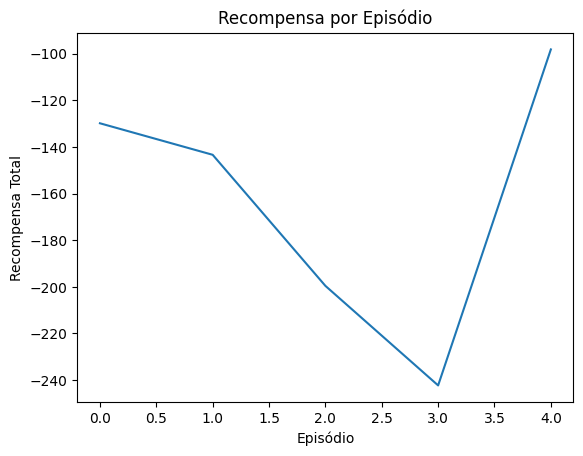

In [4]:
env = gym.make("LunarLander-v2", render_mode="rgb_array")

total_episodes = 5
rewards = []
frames = []

for episode in range(total_episodes):
    state, info = env.reset()
    done = False
    img = env.render()
    frames.append(img)
    total_reward = 0

    while not done:
        action = env.action_space.sample()
        next_state, reward, done, truncated, info = env.step(action)
        total_reward += reward
        img = env.render()
        frames.append(img)

    rewards.append(total_reward)
    print(f"Episode {episode} - Total reward {total_reward}")

env.close()


plt.plot(rewards)
plt.title('Recompensa por Episódio')
plt.xlabel('Episódio')
plt.ylabel('Recompensa Total')
plt.show()

In [5]:
display_video(frames)

### Treinamento do agente com o DQN

#### 1.1 Inicialização do ambiente

In [6]:
env = gym.make("LunarLander-v2", render_mode="rgb_array")

#### 1.2 Definindo o tamanho do espaço de ações e do estado

In [7]:
actions_size = env.action_space.n
states_size = env.observation_space.shape[0]

In [8]:
actions_size

4

In [9]:
states_size

8

#### 1.3 Definindo a arquitetura do modelo

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(states_size, ), activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(actions_size))
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01))

#### 1.4 Defindo hiperparametros e configurações

In [16]:
total_episodes = 100
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.1
discount_factor = 0.9

#### 1.4 Rodando o treinamento

In [ ]:
def get_action(model, state, epsilon):
  if np.random.rand() <= epsilon:
      action = np.random.randint(4)
  else:
      q_values = model.predict(state, verbose=0)
      action = np.argmax(q_values[0])

In [17]:
rewards = []
frames = []

for episode in range(total_episodes):
  state, info = env.reset()
  state = state.reshape(1, 8)
  total_reward = 0
  done = False

  img = env.render()
  frames.append(img)

  while not done:
    action = get_action(model, state, epsilon)
    next_state, reward, done, truncated, info = env.step(action)
    next_state = next_state.reshape(1, 8)

    img = env.render()
    frames.append(img)

    target = reward

    if not done:
      target = reward + discount_factor * np.max(model.predict(next_state.reshape(1, 8), verbose=0)[0])

    target_f = model.predict(state)
    target_f[0][action] = target
    model.train_on_batch(state, target_f)

    state = next_state
    total_reward += reward

  rewards.append(total_reward)
  epsilon = max(epsilon_min, epsilon_decay*epsilon)

  print(f"Episode: {episode + 1}, Reward: {total_reward}")

Episode: 1, Reward: 9.71997472601839
Episode: 2, Reward: -82.35070982035224
Episode: 3, Reward: -189.80278021184785
Episode: 4, Reward: 21.13725991927064
Episode: 5, Reward: -43.491294558133845
Episode: 6, Reward: -64.42644162058936
Episode: 7, Reward: -317.8821423461338
Episode: 8, Reward: -182.75065202964592
Episode: 9, Reward: -33.66271457274816
Episode: 10, Reward: -261.9443051034014
Episode: 11, Reward: -74.31960063887118
Episode: 12, Reward: -42.180042445514005
Episode: 13, Reward: 98.9135017386175
Episode: 14, Reward: -62.13300739356157
Episode: 15, Reward: 9.622826707888324
Episode: 16, Reward: -209.82328883784228
Episode: 17, Reward: -121.97773610538303
Episode: 18, Reward: 8.904904503042246
Episode: 19, Reward: 10.57062467631669
Episode: 20, Reward: -139.30256855533673
Episode: 21, Reward: -206.2226542152674
Episode: 22, Reward: 8.394118000844824
Episode: 23, Reward: -32.78099420650805
Episode: 24, Reward: -59.086905861081036
Episode: 25, Reward: -8.668358886044263
Episode: 2

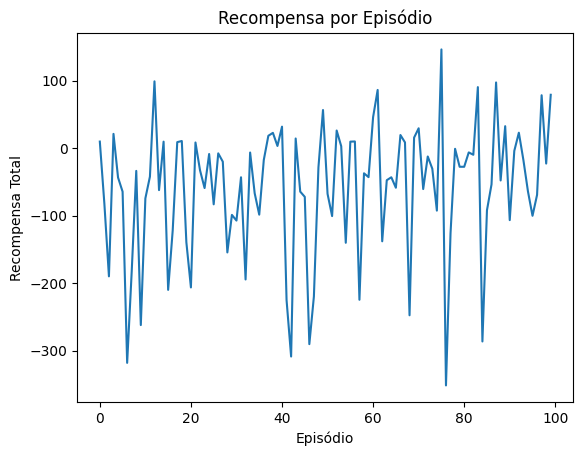

In [19]:
plt.plot(rewards)
plt.title('Recompensa por Episódio')
plt.xlabel('Episódio')
plt.ylabel('Recompensa Total')
plt.show()

In [20]:
display_video(frames)